## 2-11. 프로젝트(2) load_wine : 와인 분류
1. 필요한 모듈 import하기
2. 데이터 준비
3. 데이터 이해하기
  * Feature Data 지정하기
  * Label Data 지정하기
  * Target Names 출력해 보기
  * 데이터 Describe 해 보기
4. train, test 데이터 분리
5. 다양한 모델로 학습시켜보기
  * Decision Tree 사용해 보기
  * Random Forest 사용해 보기
  * SVM 사용해 보기
  * SGD Classifier 사용해 보기
  * Logistic Regression 사용해 보기
6. 모델을 평가해 보기
  학습된 모델들의 테스트데이터 예측 결과를 어떻게 해석해야 할까요? 모델의 성능을 평가하는 지표로는 무엇이 좋을까요? sklearn.metrics 에서 제공하는 평가지표 중 적절한 것을 선택해 보세요. 선택하신 이유도 설명해 주세요

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [3]:
wine = load_wine()
mean = wine.data.mean(axis=0)
std = wine.data.std(axis=0)
data = (wine.data - mean) / std
data.shape

(178, 13)

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [14]:
data[0]

array([ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
        0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
        0.36217728,  1.84791957,  1.01300893])

In [16]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [17]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [20]:
import numpy as np
np.bincount(wine.target)

array([59, 71, 48])

In [33]:
label = wine.target
print(label.shape)
label

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [34]:
np.bincount(y_test)

array([12, 12, 12])

### 도수분포도 (histogram)

In [35]:
_, bins=np.histogram(data[:,0], bins=20)
np.histogram(data[:,0], bins=20)

(array([ 1,  0,  4,  7,  7, 11, 15, 16, 10, 13, 13, 12, 14, 12, 17,  7, 11,
         6,  0,  2]),
 array([-2.43423535, -2.199535  , -1.96483466, -1.73013432, -1.49543397,
        -1.26073363, -1.02603329, -0.79133294, -0.5566326 , -0.32193226,
        -0.08723191,  0.14746843,  0.38216877,  0.61686912,  0.85156946,
         1.0862698 ,  1.32097015,  1.55567049,  1.79037083,  2.02507118,
         2.25977152]))

Text(0.5, 1.0, 'alcohol')

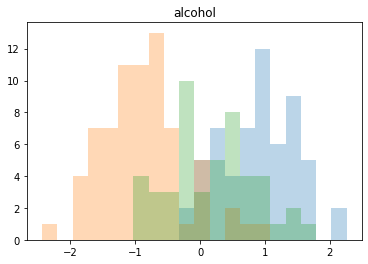

In [36]:
import matplotlib.pyplot as plt
class_0 = data[wine.target==0]
class_1 = data[wine.target==1]
class_2 = data[wine.target==2]

plt.hist(class_0[:,0], bins=bins, alpha=0.3)
plt.hist(class_1[:,0], bins=bins ,alpha=0.3)
plt.hist(class_2[:,0], bins=bins, alpha=0.3)
plt.title(wine.feature_names[0])

### training 데이터, test 할당

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    label,
                                                    test_size=0.2,
                                                    random_state=15)

### Decision Tree

In [9]:
model = DecisionTreeClassifier(random_state=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.91      0.83      0.87        12
           2       0.92      0.92      0.92        12

    accuracy                           0.92        36
   macro avg       0.92      0.92      0.92        36
weighted avg       0.92      0.92      0.92        36



### Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



### SVM

In [11]:
from sklearn import svm

model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.86      1.00      0.92        12
           2       1.00      0.92      0.96        12

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.95        36



### SGD Classifier

In [12]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.92      1.00      0.96        12
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## 결과분석

평가지표 : f1-score

세 가지 와인에 대한 상품 등급이 정해져 있다면 좋은 품질의 와인을 나쁜 품질의 와인으로 분류하지 않는 것은 판매자에게 중요하고, 나쁜 품질의 와인을 좋은 품질로 분류하지 않는 것은 소비자에게 중요하기 때문에 이를 적절히 표현해주는 f1-score가 중요하다고 판단됨 